<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>


<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___


<div class="alert alert-info">
    
<b>Ответ</b>

Привет! Рада знакомству и совместной работе!
    
Сразу скажу спасибо за твои комментарии - это очень ценно для меня.
    
Надеюсь, я всё поправила как нужно и ты можешь его принять (очень надеюсь). Несколько ошибок было из-за моей невнимательности, к сожалению.(((
</div>

# Прогноз продаж интернет-магазина компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем все необходимые для решения поставленных задач библиотеки.

In [1]:
# <импорт библиотеки numpy>
import numpy as np

# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки matplotlib для работы с графиками>
import matplotlib.pyplot as plt
# <импорт библиотеки seaborn для работы со статистическими графиками>
import seaborn as sns

# <импорт библиотеки scipy>
from scipy import stats as st

pd.options.mode.chained_assignment = None

Прочитаем файл .csv и сохраним в переменную *'df'*.

In [2]:
# <чтение файлов с данными о продажах игр, оценке пользователей и экспертов, жанрах и платформах
# и сохранением в df>
df = pd.read_csv('/datasets/games.csv')

Выведем первые строки таблицы *df*.

In [3]:
# <получение первых 5 строк таблицы df>
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных таблицы *df*.

In [4]:
# <Получение общей информации о данных в таблице df>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов, тип данных у шести столбцов – *float64*, у пяти – *object*.

Подробно разберём, какие в *df* столбцы и какую информацию они содержат:

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

### Вывод

Датафрейм содержит данные о продажах игр, оценке пользователей и экспертов, жанры и платформы. Столбец *'Rating'* сформирован ESRB - ассоциацией, определяющей возрастной рейтинг компьютерных игр.

Проблемы с данными, которые необходимо решить:
* названия столбцов необходимо привести к нижнему регистру;
* пропуски в столбцах *'Name'*, *'Year_of_Release'*, *'Criric_Score'* и *'User_Score'*, *'Rating'*, *'Genre'*;
* формат данных года выпуска Year_of_Releas *float64*.

Необходимо будет посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. Для этого необходимо исключить аномалии и пропуски, а также, привести данные в обрабатываемый вид во всех столбцах.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


## Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру).

In [5]:
# <Приведем названия столбцов к нижнему регистру>
df.columns = df.columns.str.lower()

# <получение первых 5 строк таблицы df>
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов приведены к нижнему регистру.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хорошее решение
</div>


* Обработайте пропуски при необходимости:
    * объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * опишите причины, которые могли привести к пропускам;
    * обратите внимание на аббревиатуру *'tbd'* в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать.

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [6]:
# <Суммарное количество пропусков, выявленных методом .isnull() в таблице df>
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Рассмотрим по-подробнее пропуски в столбцах *'name'*, *'year_of_release'*, *'genre'*. Их не так много.

In [7]:
# <Строки с пропущенными значениями в столбце 'name'>
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
# <Строки с пропущенными значениями в столбце 'year_of_release'>
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# <Строки с пропущенными значениями в столбце 'genre'>
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В строках с пропусками в столбцах *'name'* и *'genre'* содержится совсем мало информации, да и четыре строки погоду для результатов анализа не сделают. Удалим их.

А вот в столбце *'year_of_release'* 269 строк с пропущенными значениями. Посмотрим какую долю они составляют от информации всего столбца.

In [10]:
# <выведем долю пропущенных значений для каждого столбца, где они есть>
for column in df:
    if df[column].isnull().sum() > 0:
        print("{: <20}".format(column), 
              "{:.1%}".format(df[column].isnull().sum()/len(df)), 
              '\n')

name                 0.0% 

year_of_release      1.6% 

genre                0.0% 

critic_score         51.3% 

user_score           40.1% 

rating               40.5% 



1.6% - не так уж и много. Удалим эти пропуски. 

In [11]:
# <Удалим пропуски в столбцах 'name', 'genre' и 'year_of_release'>
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# <Получение общей информации о данных в таблице df>
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Удалять пропуски в столбцах *'critic_score'*, *'user_score'* и *'rating'* будет некорректно: их доля составляет более 40% для каждого столбца. Рассмотри их более подробно.

Столбец *'user_score'* имеет тип данных *object*. Рассмотрим подробнее какие значения он содержит.

In [12]:
# <Просмотрим все уникальные значения в столбце 'user_score'>
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме значений рейтинга в столбце присутствуют *'nan'* и *'tbd'*. Если с пропущенными значениями более или менее всё ясно, то с *'tbd'* не всё так просто. Это значение не даст преобразовать тип данных столбца в *float64*. Заменим их на *'NaN'*: аббревиатура *'tbd'* означает «To Be Determined», то есть «Будет определено», то есть «Пока не известно».

In [13]:
# <Преобразуем данные 'tbd' столбца 'user_score' в 'NaN'>
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

# <Преобразуем данные столбца 'user_score' из типа данных 'object' в 'float64'>
df['user_score'] = df['user_score'].astype('float')

# <Просмотрим все уникальные значения в столбце 'user_score'>
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

~Cоздадим сводную таблицу отражающую медианную оценку пользователей и критиков по каждому жанру. Эти значения применим для заполнения пропусков столбца *'critic_score'* и *'user_score'*.~

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты использовала хороший подход.
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Но в этот раз не нужно заполнять пропуски в 'critic_score' и 'user_score', так как у нас половина исследования строится на анализе этих признаков. Давай лучше оставим пропуски или, если пропуски не подходят, заполним значением "-1".
    
Если мы будем заполнять пропуски с помощью маркера, нужно будет отфильтровывать эти строки при расчете корреляции и т.д.
</div>


<div class="alert alert-info">
    
Ок, принято и поправлено. Описано ниже синим.
</div>

<span style="color:blue">Пропуски в столбцах *'critic_score'* и *'user_score'* заполним маркеорм (*-1*) для удобства фильтрации данных в дальнейшем.</span>

In [14]:
# <заменим пропуски в столбце с оценкой критиков>
df['critic_score'].fillna(-1,inplace=True)

# <проверим наличие пропусков в столбце с оценкой критиков и выведем его методом isnull()>
df['critic_score'].isnull().sum()

0

In [15]:
# <заменим пропуски в столбце с оценкой пользователей>
df['user_score'].fillna(-1,inplace=True)

# <проверим наличие пропусков в столбце с оценкой пользователей и выведем его методом isnull()>
df['user_score'].isnull().sum()


0

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Супер!
</div>


Отлично! Со столбцами с оценками критиков и пользователей разобрались. Перейдём к столбцу с возрастным рейтингом ESRB.

Рассмотрим подробнее какие значения он содержит.

In [16]:
# <Просмотрим все уникальные значения в столбце 'rating'>
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию:
* «EC» («Early childhood») — «Для детей младшего возраста»;
* «E» («Everyone») — «Для всех»;
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
* «T» («Teen») — «Подросткам»:
* «M» («Mature») — «Для взрослых»;
* «AO» («Adults Only 18+») — «Только для взрослых»;
* «RP» («Rating Pending») — «Рейтинг ожидается»;
* «K-A» («Kids to Adults»)— «Для детей и взрослых».

Пропуски можно заменить на «RP» («Rating Pending») — «Рейтинг ожидается».

In [17]:
# <Заменим пропуски в столбце 'rating' на 'RP'>
df.loc[df.loc[:,'rating'].isnull(),'rating'] = 'RP'

# <Получение общей информации о данных в таблице df>
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

Пропущенных значений в таблице не осталось.

* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

Данные в столбце *'year_of_release'* имеют тип *'float64'*. Год выпуска - значение целочисленное, поэтому приведём данные в этом столбце к типу *'int64'*.

In [18]:
# <Преобразуем данные столбца 'year_of_release' из типа данных 'float64' в 'int64'>
df['year_of_release'] = df['year_of_release'].astype('int')

Данные столбца *'user_score'* преобразованы из типа данных *object* в *float64* при заполнении пропусков.

Проверим наличие в таблице *'df'* дубликатов.

In [19]:
# <Проверим наличие в таблице 'df' дубликатов>
df.duplicated().sum()

0

* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [20]:
# <Добавим столбец 'total_sales' в таблицу df,
# в который просуммируем построчно значения из столбцов 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'>
df['total_sales'] = df.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

# <Получение первых 5 строк таблицы df>
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


### Вывод

Все данные приведены к нужным типам:
* в столбце *'year_of_release'* - к *int64*;
* в столбце *'user_score' * - к *float64*.

Пропуски обработаны:
* строки с пропусками в столбцах *'name'*, *'genre'*, *'year_of_release'* удалены, т.к. составляют совсем малую долю (менее 1.6%) от общего числа строк и их отсутствие никак не повлияет на результаты исследвания;
* значения *'tbd'* в столбце *'user_score'* заменены на *'NaN' (аббревиатура 'tbd' означает «To Be Determined», то есть «Будет определено», то есть «Пока не известно») для удобства обработки;
* пропуски в столбцах *'critic_score'* и *'user_score'* <span style="color:blue">заменены маркерами для удобства фильтрации.</span>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты хорошо справилась с подготовкой данных
</div>

<div class="alert alert-info">
    
Спасибо. Если честно, этот блок всегда вызывает некие сложности: вроде всё понятно и просто, но он достаточно объёмный в большинстве проектов. Тут, конечно, всё было проще. И, к своему удивлению (приятному), я потратила не слишком много времени на него (в отличие от следующих блоков). Но в этот раз это было впервые. Я переживала, что, что-то упустила.
Спасибо за хорошую оценку и твои комментарии.
</div>

## Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

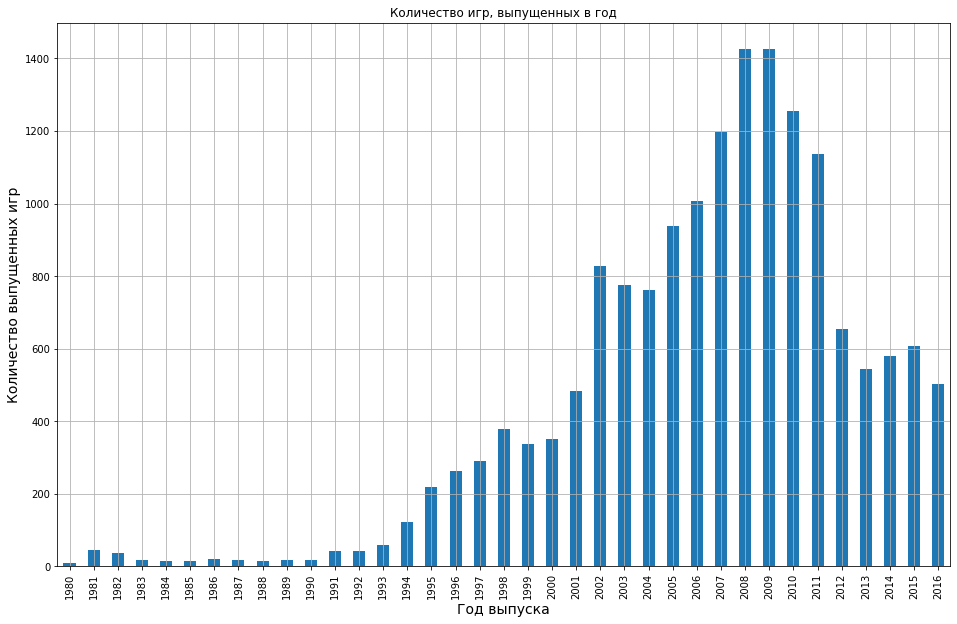

In [21]:
# <Выведем график количества игр, выпущенных в каждый год>
(
    df
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .plot(kind = 'bar', grid=True, legend=False, title="Количество игр, выпущенных в год", figsize=(16, 10))
)

plt.ylabel('Количество выпущенных игр', fontsize=14)
plt.xlabel('Год выпуска', fontsize=14)
plt.show()

Больше 1000 игр в год выпускалось в период с 2006 по 2011 год.
Начиная с 2012 года объём выпускаемых ежегодно игр заметно упал: менее 700 игр в год.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

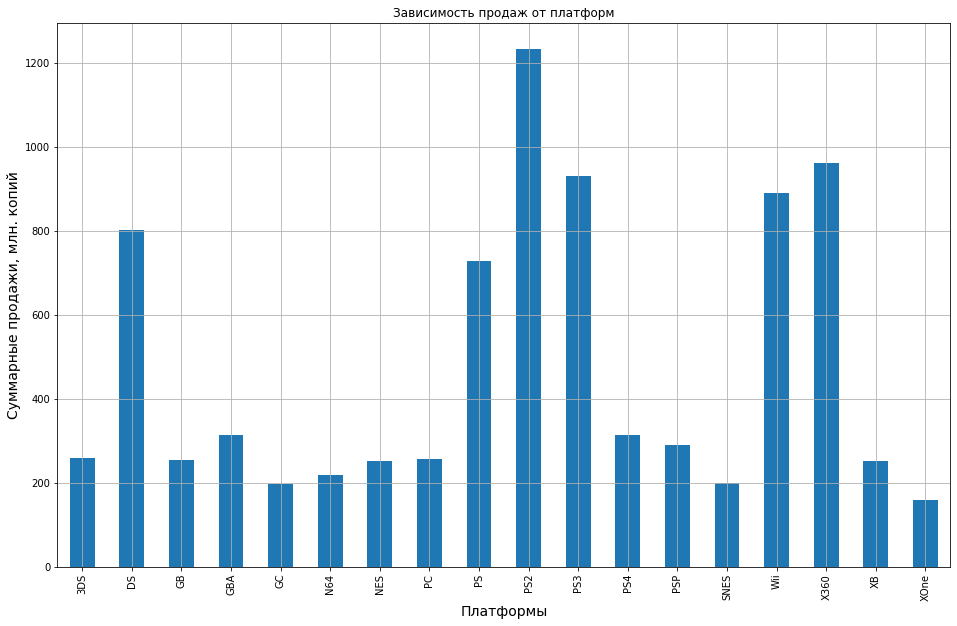

In [22]:
# <Сгруппируем данные по суммарным продажм игр на различных платформах>
top_platforms = df.groupby('platform').agg({'total_sales':'sum'})

# <Рассмотрим только те платформы, которые продали более 100 млн копий>
top_platforms = top_platforms[top_platforms['total_sales']>=100]

# <Выведем график общего количества продаж по платформам>
(
    top_platforms
    .pivot_table(index=['platform'], values = 'total_sales', aggfunc = 'sum')
    .plot(kind = 'bar', grid=True, legend=False, title="Зависимость продаж от платформ", figsize=(16, 10))
)

plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Платформы', fontsize=14)
plt.show()

Из всех платформ с продажами более 100 млн копий выделяются платформы с количеством проданных копий болеее 800 млн:
* PS2;
* X360;
* PS3;
* Wii;
* DS;
* PS.

Построим график продаж для каждой из этих платформ по годам.

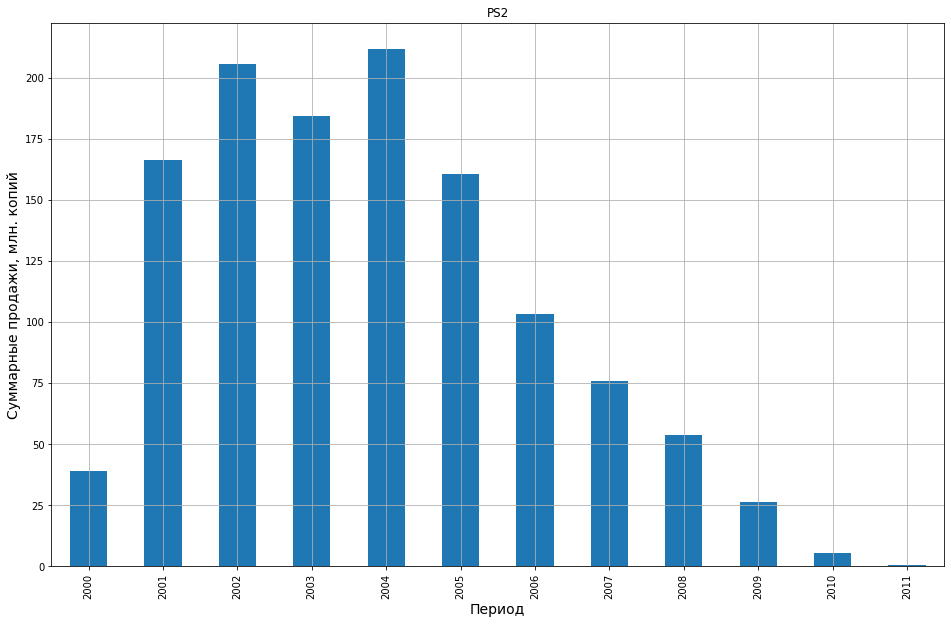

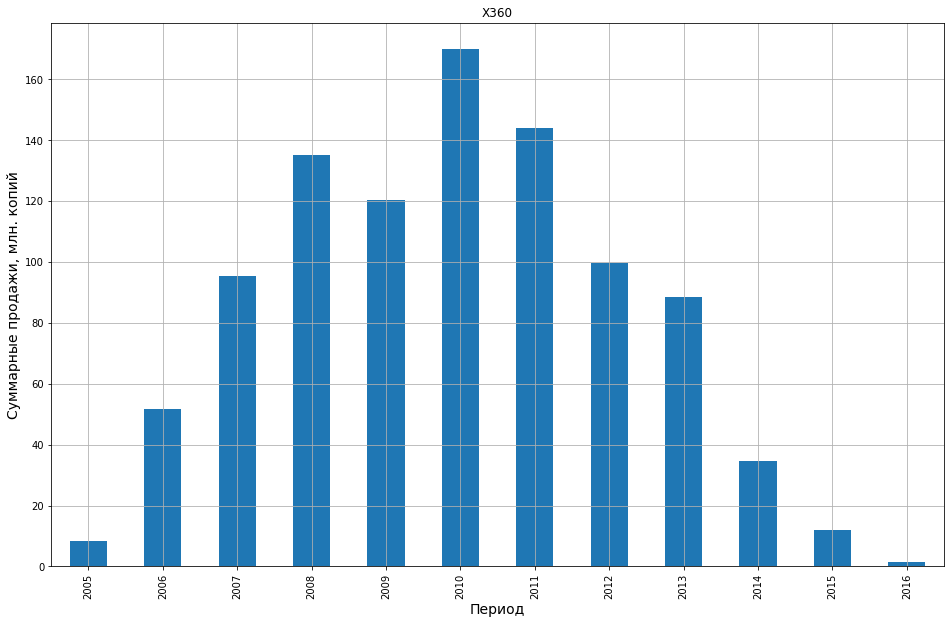

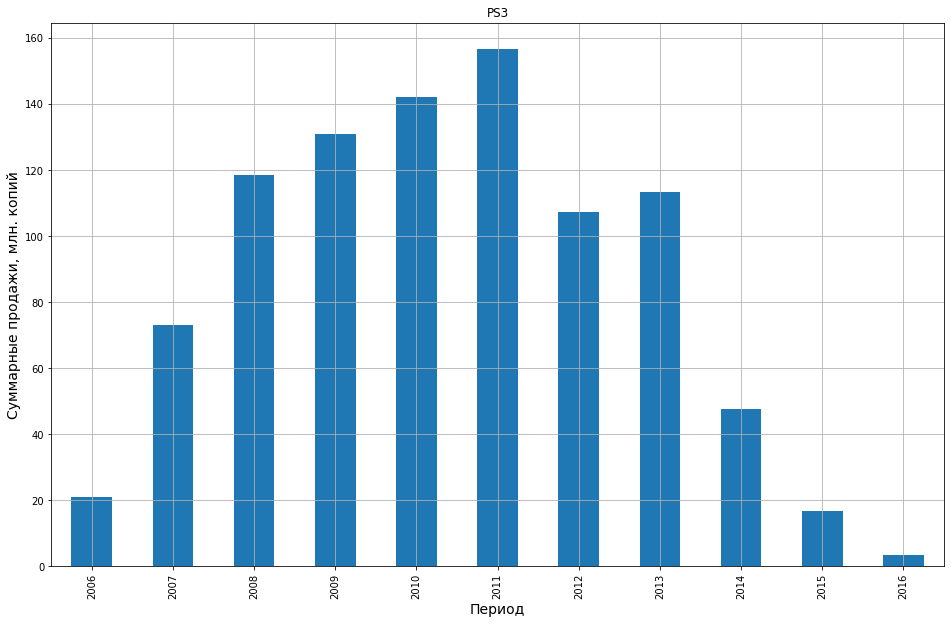

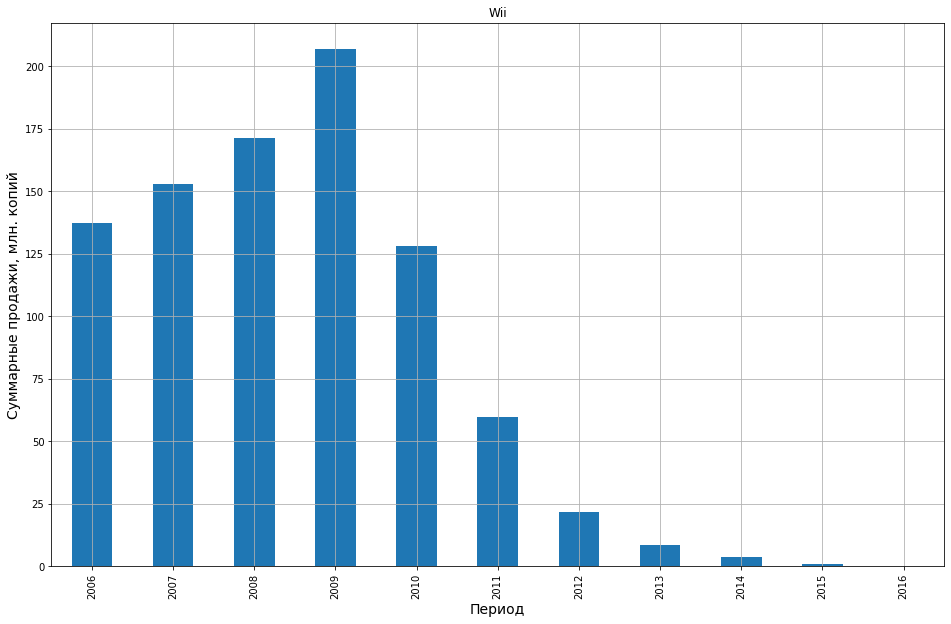

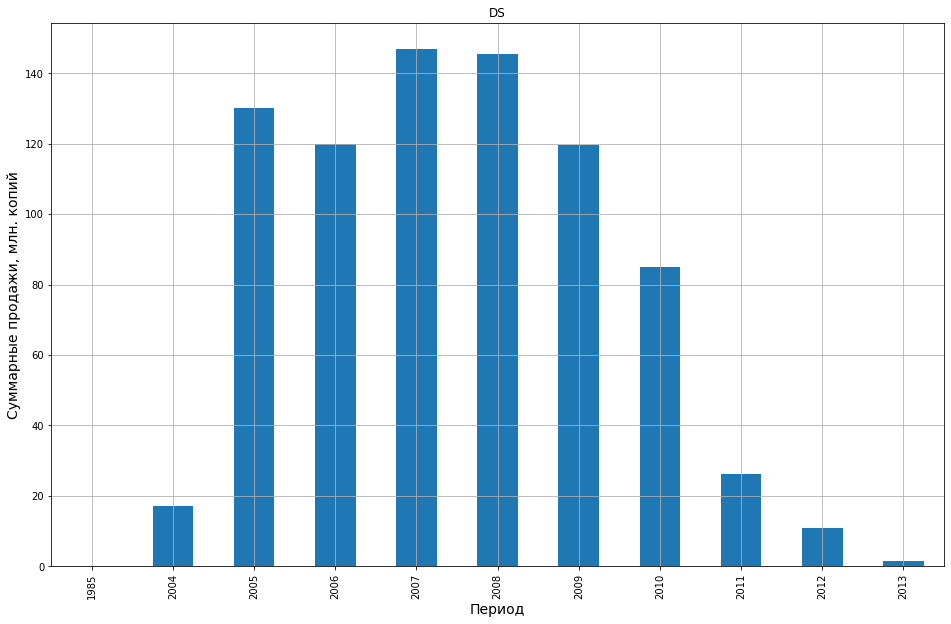

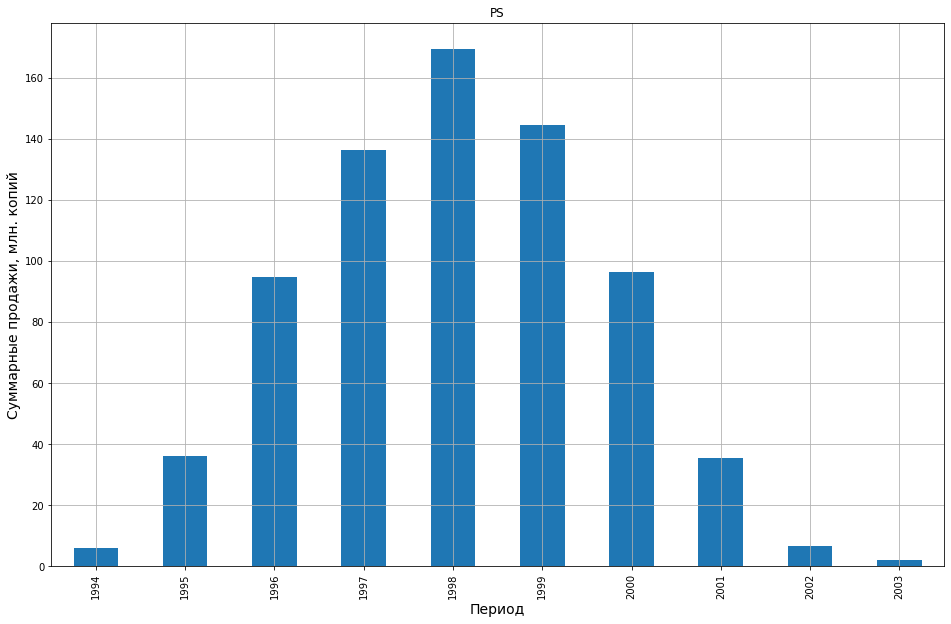

In [23]:
# <Выделим в словарь платформы с продажами более 800 млн копий>
top_platforms_dict = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# <Построим для каждой платформы распределение количества продаж за каждый период>
for platform in top_platforms_dict:
    (
        df[df['platform'] == platform]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind = 'bar', grid=True, legend=False, figsize=(16, 10))
    )

    plt.title(platform)
    plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
    plt.xlabel('Период', fontsize=14)
    plt.show()

Из графиков видно, что в среднем каждая плотформа "живёт" 10 лет. Но пик продаж находится в районе 4 - 6 года существования платформ. Поэтому актуальным периодом выберем диапазон за последние 4 года, т. е. с 2013 года.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно определила срок жизни платформы и актуальный период
</div>

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.

In [24]:
# <Выделим данные за последние 10 лет в таблицу>
actual_df = df.query('year_of_release >= 2013')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,RP,0.01


* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

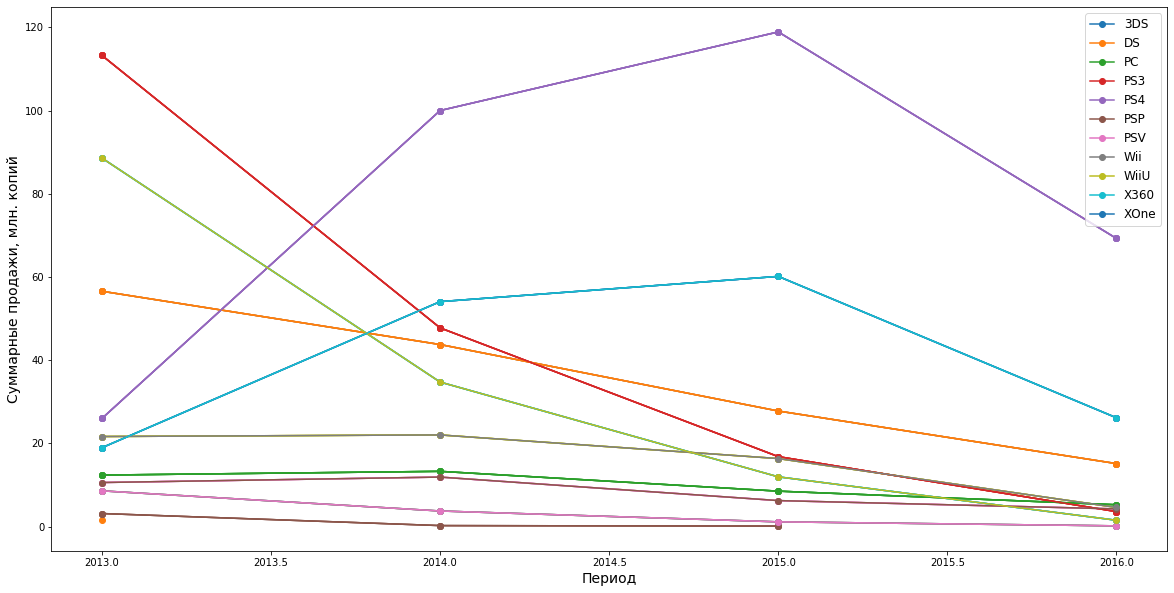

In [25]:
# <Сгруппируем данные по суммарным продажм игр на различных платформах>
actual_pivot_table = actual_df.pivot_table(index = ['year_of_release','platform'], values = 'total_sales', aggfunc = 'sum')
pivot_table_index = actual_pivot_table.index.to_list()
actual_pivot_table["years"] = [year for year, platform in pivot_table_index]
actual_pivot_table.index = [platform for year, platform in pivot_table_index]

fig, ax = plt.subplots(figsize =(20,10))
for platform in actual_pivot_table.index:
    ax.plot(actual_pivot_table.loc[platform]['years'],
            actual_pivot_table.loc[platform]['total_sales'], marker='o')
ax.legend(actual_pivot_table.index.unique(),prop = {'size':12})
plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Период', fontsize=14)
plt.show()

Из графика видно, что практически все платформы находятся в стадии снижения продаж, но стоит учитывать, что данные за 2016 год могут быть неполными. Особенно заметно, как падают продажи на платформе PS3 после выхода PS4.

Наиболее прибыльны: PS4, XOne, PC, PS3, X360.

PC, PS4, PSV, XOne, и WiiU - растущие плафтормы.
 
Наиболее перспективные платформы: PS4, XOne, PC, PS3, X360 и PSV - как растущие и наиболее прибыльные.


<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Дай, пожалуйста, комментарий, как ты определила растущие платформы? По графику выше (с продолжительностью жизни) видно, что по X360 продажи падают
</div>

<div class="alert alert-info">
    
Эм, заметила, что если что-то правишь в графике после того, как написал код дальше, лучше перезапускать Kernel: даёт разные отображения. Да, X360 - одна из самых прибыльных платформ, но после набора популярности XOne продажи на ней стали падать. Но не стоит забывать, что данные за 2016 год могут быть неполными. Поправила: Х360 записана теперь только как прибыльная.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Молодец, что внесла изменения
</div>


* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

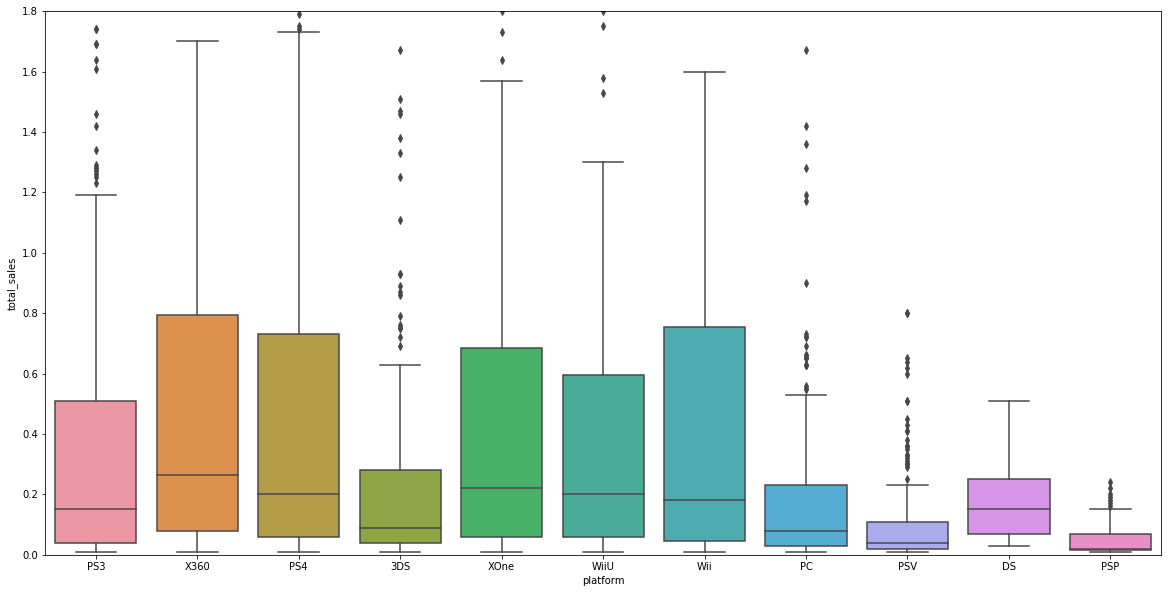

In [26]:
# <Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам>
fig, ax = plt.subplots(figsize =(20,10))
sns.boxplot(x = 'platform', y = 'total_sales', data = actual_df, ax = ax)
plt.ylim(0, 1.8)
plt.show()

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший график
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Но не нужно фильтровать данные перед созданием графика, потому что это влияет на значение квартилей.
    
Лучше было использовать метод .ylim(), чтобы ограничить значения по оси Y на графике.
    
[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)
</div>


<div class="alert alert-info">
    
Ок, принято и поправлено.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Молодец, что поправила график
</div>


Медианное значение продаж у платформ PS4, PS3 и Wii меньше, чем у XOne и DS (значения распределены более равномерно), но датасет скошен вправо. На этих платформах осуществляются продажи игр, которые не осуществляются на других, возможно, из-за ценника или жанров игр. Наиболее перспективной и прибыльной выглядит платформа X360: достаточно высокое медианное значение продаж и большой перекос в положительную сторону.

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Рассмотрим влияние отзывов пользователей и критиков на продажи внутри платформы X360.

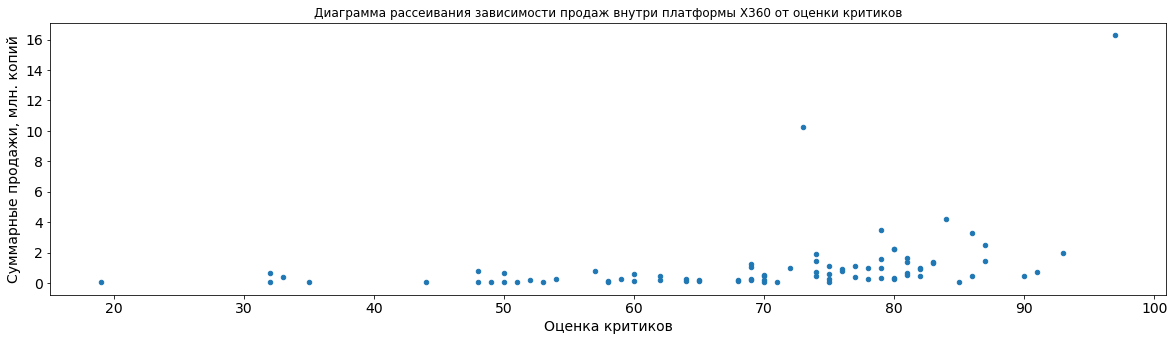

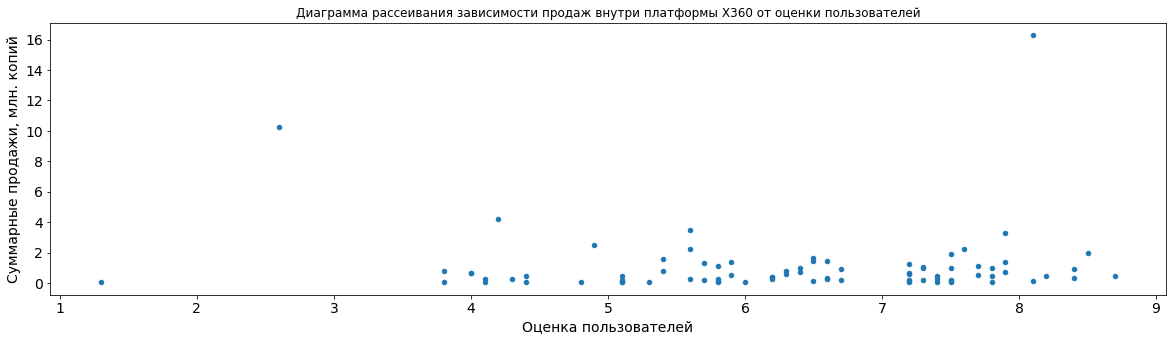

,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.006238
total_sales,0.350345,-0.006238,1.000000


In [27]:
# <Выделим в отдельную таблицу данные по платформе X360 за актуальный период
# и отфильтруем маркеры>
x360_df = actual_df.query('platform == "X360"')
x360_df = x360_df[(x360_df['critic_score']!=-1) & (x360_df['user_score']!=-1)]
x360_df = x360_df[['critic_score', 'user_score', 'total_sales']]

# <Построим диаграмму рассеивания для оценки влияния отзывов критиков на продажи внутри платформы X360>
x360_df.plot(x='critic_score', y='total_sales', kind='scatter', figsize = (20,5), 
             title = 'Диаграмма рассеивания зависимости продаж внутри платформы X360 от оценки критиков', fontsize = 14)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=14)
plt.show()

# <Построим диаграмму рассеивания для оценки влияния отзывов пользователей на продажи внутри платформы X360>
x360_df.plot(x='user_score', y='total_sales', kind='scatter', figsize = (20,5), 
             title = 'Диаграмма рассеивания зависимости продаж внутри платформы X360 от оценки пользователей', fontsize = 14) 
plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.show()

# <выведем коэффициенты корреляции по таблице x360_df>
display(x360_df.corr())

Из диаграмм рассеивания видно, что наибольшая плотность продаж находится в диапазонах рейтингов у критиков от 65 до 75, а у пользователей - от 6 до 8. Однако, коэффициент корреляции Пирсона говорит о наличии соевршенно незначительной зависимости количества продаж от оценки критиков, и о практически полном отсутствии зависимости количества продаж от рейтинга у пользователей.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты правильно определила зависимость продаж от оценок
</div>

* Соотнесите выводы с продажами игр на других платформах.

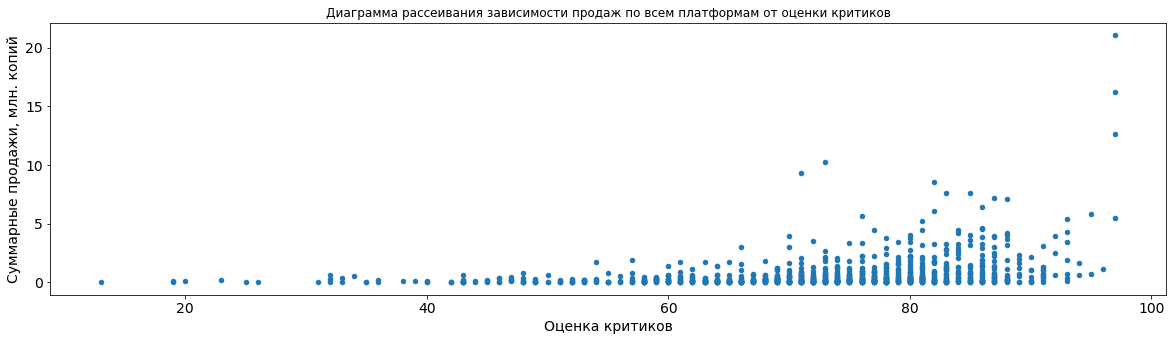

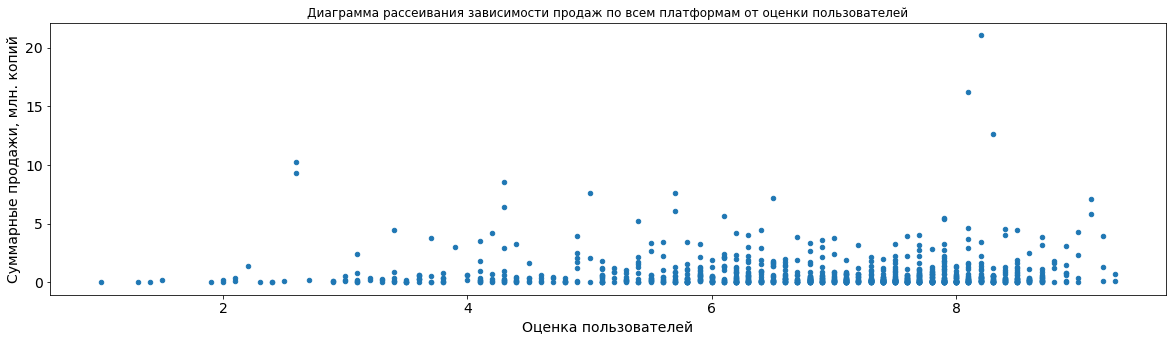

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.311692
user_score,0.502221,1.000000,-0.004064
total_sales,0.311692,-0.004064,1.000000


In [28]:
# <Выделим из актуального татасета столбцы с оценками критиков и пользоватей, а также, суммарные продажи
# и отфильтруем маркеры>
actual_stat_df = actual_df[['critic_score', 'user_score', 'total_sales']]
actual_stat_df = actual_stat_df[(actual_stat_df['critic_score']!=-1) & (actual_stat_df['user_score']!=-1)]

# <Построим диаграмму рассеивания для оценки влияния отзывов критиков на продажи>
actual_stat_df.plot(x='critic_score', y='total_sales', kind='scatter',figsize = (20,5), 
                    title = 'Диаграмма рассеивания зависимости продаж по всем платформам от оценки критиков', fontsize = 14)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=14)
plt.show()

# <Построим диаграмму рассеивания для оценки влияния отзывов пользователей на продажи>
actual_stat_df.plot(x='user_score', y='total_sales', kind='scatter', figsize = (20,5), 
                    title = 'Диаграмма рассеивания зависимости продаж по всем платформам от оценки пользователей', fontsize = 14) 
plt.ylabel('Суммарные продажи, млн. копий', fontsize=14)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.show()

# <выведем коэффициенты корреляции по таблице>
display(actual_stat_df.corr())

Зависимость продаж от оценок критиков и пользователей для всех платформ аналогична зависимости для платформы Х360: никакая.

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [29]:
# <Создадим сводную таблицу с количеством, медианным значением и общей суммой продаж по жанрам,
# переименуем столбцы и отсортируем таблицу по суммарным значениям продаж>
genre_df = actual_df.pivot_table(index='genre', values='total_sales', aggfunc = ['count','median','sum'])
genre_df.columns = ['count', 'median','sum']
genre_df = genre_df.sort_values(by = 'sum', ascending = False)

# <Выведем таблицу с количеством, медианным значением и общей суммой продаж по жанрам>
genre_df

,count,median,sum
genre,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


Можно заметить, что не всегда количество игр жанра гарантирует хорошие продажи. К примеру, в жанре *Adventure* выпущено игр значительно больше, чем в некоторых других, но они имеют очень маленькое медианное значение продаж.

Кроме того, существуют обратные случаи, когда медианное значение продаж приближается к максимальному, среди всех жанров, но количество игр очень маленькое: жанр Simulation.

Самые прибыльные жанры сочетают два параметра: у них большое количество игр и высокое медианное значение.

### Вывод

Мы вявили, что в среднем каждая плотформа "живёт" 10 лет. Но в качестве актуального периода выбрали диапазон за последние 4 года (т. е. с 2013 года), т. к. пик продаж находится в районе 4 - 6 года существования платформ.

За актуальный период выявили самые прибыльные и растущие платформы: PS4, XOne, PC, PS3, X360 и PSV.

Определили, что продажи на платформах не зависят напрямую от рецтинга критиков и пользователей.

Самые прибыльные жанры: Action, Shooter, Sports.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Шаг 4. Составьте портрет пользователя каждого региона

* Определите для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Опишите различия в долях продаж.

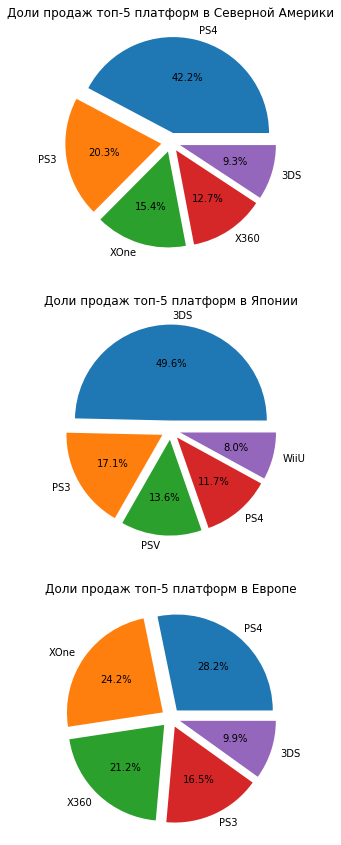

In [30]:
# <Составим сводную таблицу по количеству игр на различных платформах в зависимости от региона>
rating_df = actual_df.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
rating_df.columns = ['na_sales','jp_sales','eu_sales']

# <Топ-5 на рынке Северной Америки>
top5_platform_na = rating_df.sort_values('na_sales', ascending=False).head(5)
top5_platform_na = top5_platform_na[['na_sales']]

# <Топ-5 на рынке Японии>
top5_platform_jp = rating_df.sort_values('jp_sales', ascending=False).head(5)
top5_platform_jp = top5_platform_jp[['jp_sales']]

# <Топ-5 на рынке Европы>
top5_platform_eu = rating_df.sort_values('eu_sales', ascending=False).head(5)
top5_platform_eu = top5_platform_eu[['eu_sales']]

# <Построим по каждому региону кусочную диаграмму доли продаж топ-5 платформ>
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].set_title('Доли продаж топ-5 платформ в Северной Америки')
axs[0].pie(top5_platform_na.na_sales, 
              labels=top5_platform_na.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[1].set_title('Доли продаж топ-5 платформ в Японии')
axs[1].pie(top5_platform_jp.jp_sales, 
              labels=top5_platform_jp.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[2].set_title('Доли продаж топ-5 платформ в Европе')
axs[2].pie(top5_platform_eu.eu_sales, 
              labels=top5_platform_eu.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

plt.show()

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно определила платформы
    
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Тут мы видим долю платформы от суммарных продаж этой платформы в мире. А хотелось бы увидеть долю от продаж в регионе. То есть для Европы сумма долей платформ PS4 XOne X360 PS3 3DS должна быть не больше 100%.


</div>


<div class="alert alert-info">
    
Ок, принято и поправлено.

В Slack ребята посоветовали для наглядности нарисовать кусочную диаграмму по регионам. Выглядит понятно, мне кажется. Жаль, что сама не додумалась: для анализа любых долей - идеально же! Это тоже моя невнимательность((( Применила их к каждому пункту портрета пользователя по регионам. 
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Молодец, круговые диаграммы тут отлично подходят
</div>


Предпочтения по платформам для каждого региона отличаются. Особенно, в Японии. А вот в европейском и североамериканском регионах геймеры предпочитают примерно одинаковый список платформ. Но, в целом, Европа лидирует по продажам на большинстве платформ.

* Определите для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). Поясните разницу.

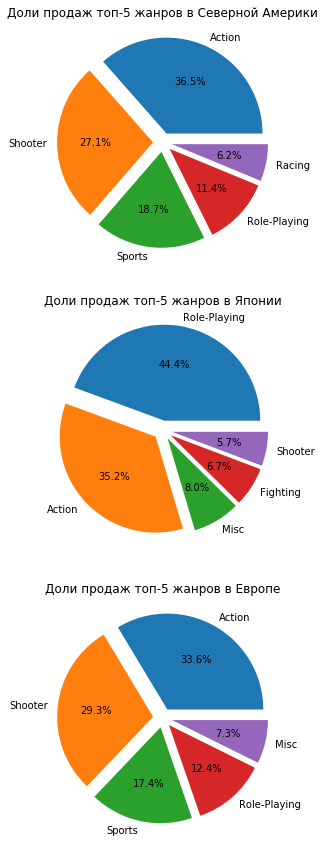

In [31]:
# <Составим сводную таблицу по количеству игр в различных жанрах в зависимости от региона>
top_genres_df = actual_df.pivot_table(index = ['genre'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
top_genres_df.columns = ['na_sales','jp_sales','eu_sales']

# <Топ-5 жанров на рынке Северной Америки>
top5_genres_na = top_genres_df.sort_values('na_sales', ascending=False).head(5)
top5_genres_na = top5_genres_na[['na_sales']]

# <Топ-5 жанров на рынке Японии>
top5_genres_jp = top_genres_df.sort_values('jp_sales', ascending=False).head(5)
top5_genres_jp = top5_genres_jp[['jp_sales']]

# <Топ-5 жанров на рынке Европы>
top5_genres_eu = top_genres_df.sort_values('eu_sales', ascending=False).head(5)
top5_genres_eu = top5_genres_eu[['eu_sales']]

# <Построим по каждому региону кусочную диаграмму доли продаж топ-5 жанров>
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].set_title('Доли продаж топ-5 жанров в Северной Америки')
axs[0].pie(top5_genres_na.na_sales, 
              labels=top5_genres_na.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[1].set_title('Доли продаж топ-5 жанров в Японии')
axs[1].pie(top5_genres_jp.jp_sales, 
              labels=top5_genres_jp.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[2].set_title('Доли продаж топ-5 жанров в Европе')
axs[2].pie(top5_genres_eu.eu_sales, 
              labels=top5_genres_eu.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

plt.show()

Жанровые предпочтения геймеров в европе и северноамериканском регионе очень схожи.

В Японии тоже, как и в других регионах любят *Action* и *Shooter*, но *Role-Playing* больше, чем везде.

Но, как мы помним, в Японии в приоритете и другие платфомы.

* Определите для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?

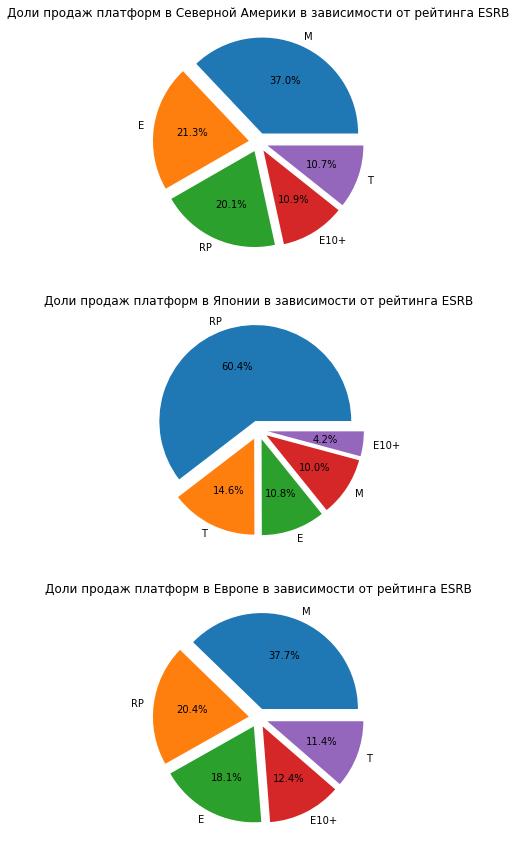

In [32]:
# <Составим сводную таблицу по количеству игр в различных рейтингах в зависимости от региона>
esrb_raiting_df = actual_df.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])
esrb_raiting_df.columns = ['na_sales','jp_sales','eu_sales']

# <Распределение продаж от рейтингов на рынке Северной Америки>
esrb_raiting_na = esrb_raiting_df.sort_values('na_sales', ascending=False)
esrb_raiting_na = esrb_raiting_na[['na_sales']]

# <Распределение продаж от рейтингов на рынке Японии>
esrb_raiting_jp = esrb_raiting_df.sort_values('jp_sales', ascending=False)
esrb_raiting_jp = esrb_raiting_jp[['jp_sales']]

# <ТРаспределение продаж от рейтингов на рынке Европы>
esrb_raiting_eu = esrb_raiting_df.sort_values('eu_sales', ascending=False)
esrb_raiting_eu = esrb_raiting_eu[['eu_sales']]

# <Построим по каждому региону кусочную диаграмму доли в зависимости от рейтинга ESRB>
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

axs[0].set_title('Доли продаж платформ в Северной Америки в зависимости от рейтинга ESRB')
axs[0].pie(esrb_raiting_na.na_sales, 
              labels=esrb_raiting_na.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[1].set_title('Доли продаж платформ в Японии в зависимости от рейтинга ESRB')
axs[1].pie(esrb_raiting_jp.jp_sales, 
              labels=esrb_raiting_jp.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[2].set_title('Доли продаж платформ в Европе в зависимости от рейтинга ESRB')
axs[2].pie(esrb_raiting_eu.eu_sales, 
              labels=esrb_raiting_eu.index, 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

plt.show()

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Так как объемы рынков разные, тут лучше смотреть в относительных, а не абсолютных значениях
</div>

<div class="alert alert-info">
    
Ок, принято и поправлено.
</div>

У рейтинга *'E'* («Для всех») основная доля продаж приходит в Северной Америке, в то время как у рейтинга *'E10+'* («Для всех от 10 лет и старше») основные продажи проходят в европейском регионе. В Японии самая большая доля продаж у игр с ожидающимся рейтингом *'RP'*. Но, самое основное, что бросается в глаза: в Европе и Америке больше всего продаж с рейтингом «M» («Для взрослых») - в Японии продажи с этим рейтингом сильно отстают.

### Вывод

Еропейский и Североамериканский регионы достаточно схожи в предпочтениях по платформам (*PS4*, *XOne*, *X360*, *PS3*, *3DS*) и жанрам (*Action*, *Shooter*, *Sports*, *Role-Playing*). Япония отличается приоритетами (в платформах *3DS*, *PS3*, *PSV*, *PS4*, *WiiU* и в жанрах *Role-Playing*, *Action*, *Misc*, *Fighting*, *Shooter*).

В Европе и Америке больше всего проданых игр с рейтингом «M» («Для взрослых»), т. е. возраст геймеров старше 18 лет. В то время как в Японии в игры больше играют в игры с рейтингом «T» («Подросткам»). Можно предположить, что это связано с популярными жанрами выбираемых игр в каждом регионе. 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Тут мы будем объёдинять выборки по рейтингу пользователей, и, поэтому следует проверит отличаются ли дисперсии совокупностей по платформам.

In [33]:
# <Из таблици за актуальный период выделим два датасета с рейтингом пользователей в зависимости от платформы>
user_score_xone = actual_df.query('user_score != -1').loc[actual_df.loc[:,'platform'] == 'XOne']['user_score']
user_score_pc = actual_df.query('user_score != -1').loc[actual_df.loc[:,'platform'] == 'PC']['user_score']

# <Выведем значения дисперсий для каждой из совокупностей>
print('Дисперсия совокупности рейтинга пользователей платформы XOne:',np.var(user_score_xone))
print('Дисперсия совокупности рейтинга пользователей платформы PC:',np.var(user_score_pc))

Дисперсия совокупности рейтинга пользователей платформы XOne: 1.8965188383045526
Дисперсия совокупности рейтинга пользователей платформы PC: 3.016306347554631


Дисперсии не равны, и они отличаются более чем в 1.5 раза. Поэтому необходимо сравнить две генеральных совокупности. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод *scipy.stats.ttest_ind (array1, array2, equal_var)*, только в этот раз зададим параметр *equal_var* равным *False*.

Нулевой гипотезой (**H<sub>0</sub>**) объявим "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Средние пользовательские рейтинги платформ Xbox One и PC отличаются".

Критический уровень статистической значимости (*alpha*) зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [34]:
# <Зададим критический уровень статистической значимости>
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

# <Применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где scipy.stats импортировано в начале как st>
result = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False) 

# <Выведем уровень значимости, на котором находятся друг от друга среднее значение и то, с которым производится сравнение>
print("p-значение:{:.1%}".format(result.pvalue))

# <Сравним полученное значение уровня значимости с критическим уровнем и выведем отвержение или наоборот нулевой гипотезы>
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:14.8%
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно сформулировала гипотезы и оценила результаты теста.
</div>

Уровни значимости, на котором находятся друг от друга средние значения двух датасетов составляет 14.8%, что говорит нам о том, что наша гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась.

Средние пользовательские рейтинги платформ Xbox One и PC с вероятностью 85.2% одинаковы.

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Тут мы будем объёдинять выборки по рейтингу пользователей, и, поэтому следует проверит отличаются ли дисперсии совокупностей по жанрам.

In [37]:
# <Из таблици за актуальный период выделим два датасета с рейтингом пользователей в зависимости от жанра>
user_score_action = actual_df.query('user_score != -1').loc[actual_df.loc[:,'genre'] == 'Action']['user_score']
user_score_sports = actual_df.query('user_score != -1').loc[actual_df.loc[:,'genre'] == 'Sports']['user_score']

# <Выведем значения дисперсий для каждой из совокупностей>
print('Дисперсия совокупности рейтинга пользователей жанра Action:',np.var(user_score_action))
print('Дисперсия совокупности рейтинга пользователей жанра Sports:',np.var(user_score_sports))

Дисперсия совокупности рейтинга пользователей жанра Action: 1.7648124186332366
Дисперсия совокупности рейтинга пользователей жанра Sports: 3.160733984375


Дисперсии не равны, и они отличаются в 1.7 раза. Поэтому необходимо сравнить две генеральных совокупности. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод *scipy.stats.ttest_ind (array1, array2, equal_var)*, только в этот раз зададим параметр *equal_var* равным *False*.

Нулевой гипотезой (**H<sub>0</sub>**) объявим "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Средние пользовательские рейтинги жанров Action и Sports разные".

Критический уровень статистической значимости (*alpha*) зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [36]:
# <Зададим критический уровень статистической значимости>
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

# <Применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где scipy.stats импортировано в начале как st>
result = st.ttest_ind(user_score_action, user_score_sports, equal_var=False) 

# <Выведем уровень значимости, на котором находятся друг от друга среднее значение и то, с которым производится сравнение>
print("p-значение:{:.1%}".format(result.pvalue))

# <Сравним полученное значение уровня значимости с критическим уровнем и выведем отвержение или наоборот нулевой гипотезы>
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.0%
Отвергаем нулевую гипотезу


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

Уровни значимости, на котором находятся друг от друга средние значения двух датасетов составляет очень маленькое число, что говорит нам о том, что наша гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" подтвердилась.

Средние пользовательские рейтинги жанров Action и Sports с вероятностью <span style="color:blue">почти 100% ~одинаковы~ разные</span>.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Тут не очень понятно  
    
    ... гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" подтвердилась ... 
    
    ... Средние пользовательские рейтинги жанров Action и Sports с вероятностью почти 100% одинаковы ... 
    
Так они разные или одинаковые?
</div>

<div class="alert alert-info">
    
Прости, это моя невнимательность. Конечно, они **разные**.
    
Принято и поправлено.
    
Пришлось ещё немного поменять значения *p-value* в выводах из-за того, что мы ввели маркеры в столбце *'user_score'* и отфильтровали их.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>
    
Супер! Молодец, что не забыла убрать значения-маркеры перед проведением статистических тестов.
</div>


Поясните:
* как вы сформулировали нулевую и альтернативную гипотезы;
* какой критерий применили для проверки гипотез и почему.

При формулировании нулевых гипотез (**H<sub>0</sub>**) для проверки гипотез необходимых для исследования выбирался знак равенства, т. е. мы говорили в (**H<sub>0</sub>**) о том что выручки по тарифам и регионам **РАВНЫ**. Соответственно, для формулирования альтернативной гипотезы (**H<sub>1</sub>**) выбирался знак неравенства.

В качестве критерия проверки гипотез мы использовали и сравнивали средние значения выборок генеральных совокупностей, т. к., согласно центральной предельной теореме, по среднему, рассчитанному из выборки, можно судить о среднем генеральной совокупности, причём чем больше выборка, тем точнее — и это работает для генеральной совокупности, распределённой каким угодно образом, и выборочные средние нормально распределены вокруг значения, точно равного среднему генеральной совокупности.

### Вывод

В первом случае отвергнуть нулевую гипотезу не получилось, т. е. подтвердилась гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а во втором - нулевую гипотезу мы отвергли: из чего мы можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports с вероятностью почти 100% одинаковы, т.е. опровергли своё предположение.

## Шаг 6. Напишите общий вывод

Из проведенного анализы мы выяснили, самыми перспективными платформами являются XOne, WiiU, PC.

Самыми популярными платформами стали:

* топ-5 платформ в Европе: PS4, XOne, X360, PS3, 3DS;
* топ-5 платформ в Японии: DS, PS3, PSV, PS4, WiiU;
* топ-5 платформ в Северо-Американского регионе: PS4, PS3, XOne, X360, 3DS.

В это же время самыми популярными жанрами стали:
* в Европе: Action, Shooter, Sports, Role-Playing, Misc;
* в Японии: Role-Playing, Action, Misc, Fighting, Shooter;
* в Северо-Американского регионе: Action, Shooter, Sports, Role-Playing, Racing.

Кроме того, мы проверили гипотезы и определили:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
* средние пользовательские рейтинги жанров Action и Sports разные.

Коэффициент корреляции Пирсона говорит о наличии совершенно незначительной зависимости количества продаж от оценки критиков, и о практически полном отсутствии зависимости количества продаж от рейтинга у пользователей.

Основываясь на всем выше перечисленном сделаем вывод, что игра имеет больше шансов на успех, если она выходит на Xbox One, а так же на платформе PS4 (или новее), а также на PC, и относится к жанру Action или Shooter.


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хороший вывод
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справилась с анализом данных и проверкой гипотез. 

Осталось немного доработать проект:

* изменить заполнение пропусков в user_score u critic_score
* изменить данные для боксплота
* поправить портрет пользователей по платформам


Жду твои исправления:)

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учла мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  заменены названия столбцов (приведены к нижнему регистру)
- [x]  пропуски обработаны
- [x]  есть объяснение, почему пропуски заполнены (или нет) определённым образом
- [x]  описаны причины, которые могли привести к пропускам
- [x]  разрбрано значение 'tbd' в столбцах с рейтингом и описано, как его обработать
- [x]  данные приведены к нужным типам
- [x]  посчитаны суммарные продажи во всех регионах
- [x]  рассмотрено, сколько игр выпускалось в разные годы
- [x]  рассмотрено, как менялись продажи по платформам
- [x]  выбраны платформы с наибольшими суммарными продажами и построено распределение по годам
- [x]  установлен характерный срок, за который появляются новые и исчезают старые платформы
- [x]  определён актуальный период для построения прогноза на 2017 год
- [x]  определены лидирующие по продажам платформы, выбрано несколько потенциально прибыльных платформ
- [x]  построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- [x]  построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами
- [x]  выводы с продажами игр на других платформах соотнесены
- [x]  рассмотренно общее распределение игр по жанрам
- [x]  для пользователя каждого региона (NA, EU, JP) определены самые популярные платформы (топ-5), описаны различия в долях продаж
- [x]  для пользователя каждого региона (NA, EU, JP) определены самые популярные жанры (топ-5)
- [x]  для пользователя каждого региона (NA, EU, JP) объяснено влияние рейтинга ESRB на продажи в отдельном регионе
- [x]  проверена гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
- [x]  проверена гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"
- [x]  есть пояснение как сформулирована нулевая и альтернативная гипотезы
- [x]  есть пояснение какой критерий применен для проверки гипотез и почему
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод